Le projet est realisé par :
Samb mouhamed , kebe moustapha , Gning mouhamadou lamine , Sintilus doowensky

# Python de base: Problem Solving

## Vacances et bagage

Vous allez en vacances et vous avez un nombre d'objets à prendre avec vous, cepenedant, il n'y pas assez d'éspace pour tout prendre dans votre voiture.

Vous essayer donc d'assigner un nombre à chaque objet representant son importance tout en lui assignant un nombre representant l'espace qu'il va prendre dans la voiture. Déterminez les objets à inclure afin que vous ne dépassiez pas la limite d'espace dans la voiture et que la l'importance totale des objets inclues soit la plus élevée possible.

Créer une fonction ```take_objects(obj_importance, obj_sizes, car_space)``` où :
- ```obj_sizes``` de taille $n_{objets}$ represente les poids de chaque objet.
- ```obj_importance``` de taille $n_{objets}$ represente l'importance de chaque objet.
- ```car_space``` est l'espace totale disponible dans la voiture.

Essayer de trouver une solution avec une complexité de $O(n_{objets}\times size)$.

In [ ]:
def take_objects(obj_importance, obj_sizes, car_space):
    """
    Détermine la combinaison optimale d'objets à mettre dans une voiture, en maximisant la valeur totale des objets sélectionnés.

    Args:
        obj_importance: Un dictionnaire associant les ID des objets à leurs valeurs d'importance respectives.
        obj_sizes: Un dictionnaire associant les ID des objets à leurs tailles respectives.
        car_space: L'espace disponible dans la voiture.

    Returns:
        Une paire de valeurs :
            * La valeur totale optimale des objets sélectionnés.
            * La liste des ID des objets sélectionnés.
    """

    # Convertissez les dictionnaires en listes ordonnées en fonction des clés (ou indices)
    sorted_importance = [obj_importance[i] for i in sorted(obj_importance.keys())]
    sorted_sizes = [obj_sizes[i] for i in sorted(obj_sizes.keys())]

    n = len(sorted_importance)

    # Créez une matrice pour stocker les résultats optimaux pour chaque sous-problème
    dp = [[0]*(car_space+1) for _ in range(n+1)]

    # Créez une matrice pour suivre les objets pris
    choices =[[0]*(car_space+1) for _ in range(n+1)]

    for i in range(1, n + 1):
        for space in range(car_space + 1):
            # Si l'objet actuel est trop gros pour l'espace disponible, ne le prenez pas
            if sorted_sizes[i - 1] > space:
                dp[i][space] = dp[i - 1][space]
            else:
                # Comparez la valeur de ne pas prendre l'objet avec la valeur de le prendre
                without_obj = dp[i - 1][space]
                with_obj = dp[i - 1][space - sorted_sizes[i - 1]] + sorted_importance[i - 1]

                if with_obj >= without_obj:
                    dp[i][space] = with_obj
                    choices[i][space] = True
                else:
                    dp[i][space] = without_obj

    # Remontez la matrice 'choices' pour trouver les objets pris
    opt = dp[n][car_space]
    selected_objects = []
    space_left = car_space

    for i in range(n, 0, -1):
        if choices[i][space_left]:
            selected_objects.append(i - 1)
            space_left -= sorted_sizes[i - 1]

    selected_objects = list(reversed(selected_objects))

    return opt, selected_objects

# Exemple d'utilisation avec des dictionnaires
obj_importance = {1: 25, 2: 20, 3: 30, 4: 40}
obj_sizes = {1: 1, 2: 2, 3: 3, 4: 6}
car_space = 11
optimal_value, selected_items = take_objects(obj_importance, obj_sizes, car_space)
print("Valeur optimale:", optimal_value)
print("Objets pris:", selected_items)


Valeur optimale: 95
Objets pris: [0, 2, 3]


## Sudoku
Écrivez un programme pour résoudre un puzzle de Sudoku en remplissant les cellules vides.

La solution d'un Sudoku doit satisfaire à toutes les règles suivantes :

- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chaque ligne.
- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chaque colonne.
- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chacune des 9 sous-cases 3x3 de la grille.

Créer une fonction ```sudoku(puzzle)``` afficher la solution du puzzle suivant avec matplotlib (metter les cases rempli par votre algorithm dans une autre couleur) :

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e0/Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg' >


Représenter le puzzle en entrée avec une table 2D de taille $9\times 9$ avec les cases vide representé par des 0.


Voici la solution du Sudoku :

Ce programme fonctionne en utilisant une approche de backtracking. Il commence par trouver la première cellule vide dans la grille. Ensuite, il essaie tous les nombres possibles pour cette cellule, un par un. Pour chaque nombre, il vérifie si le nombre est valide pour la cellule, en vérifiant s'il n'apparaît pas déjà dans la ligne, la colonne ou le bloc de la cellule. Si le nombre est valide, il est placé dans la cellule et le programme passe à la cellule suivante. Si le nombre n'est pas valide, il est ignoré et le programme essaie le prochain nombre.





5 3 4 6 7 8 9 1 2 
6 7 2 1 9 5 3 4 8 
1 9 8 3 4 2 5 6 7 
8 5 9 7 6 1 4 2 3 
4 2 6 8 5 3 7 9 1 
7 1 3 9 2 4 8 5 6 
9 6 1 5 3 7 2 8 4 
2 8 7 4 1 9 6 3 5 
3 4 5 2 8 6 1 7 9 


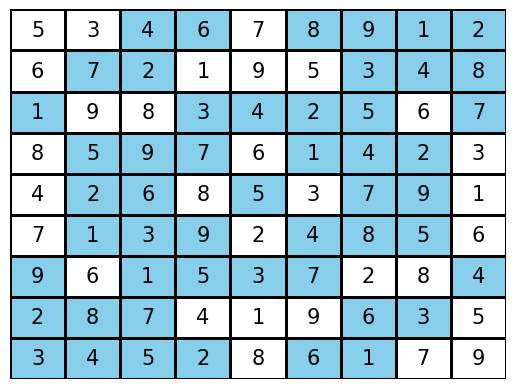

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import copy

def is_valid_move(puzzle, row, col, number):
    """
    Vérifie si placer le nombre `number` dans la cellule `(row, col)` de la grille `puzzle` est valide.

    Args:
        puzzle: Une table 2D de taille 9x9.
        number: Le nombre à vérifier.
        row: La ligne de la cellule à vérifier.
        col: La colonne de la cellule à vérifier.

    Returns:
        True si le placement est valide, False sinon.
    """

    for i in range(9):
        if puzzle[i][col] == number or puzzle[row][i] == number:
            return False
    c_row = row - row % 3
    c_col = col - col % 3
    for i in range(3):
        for j in range(3):
            if puzzle[c_row + i][c_col + j] == number:
                return False
    return True

def solve(puzzle, row, col):
    """
    Résoud le puzzle de Sudoku en remplissant les cellules vides.

    Args:
        puzzle: Une table 2D de taille 9x9 avec les cases vides représentées par des 0.
        row: La ligne de la cellule courante.
        col: La colonne de la cellule courante.

    Returns:
        True si le puzzle a une solution, False sinon.
    """
    if col == 9:
        if row == 8:
            return True
        row += 1
        col = 0
    if puzzle[row][col] > 0:
        return solve(puzzle, row, col + 1)
    for i in range(1, 10):
        if is_valid_move(puzzle, row, col, i):
            puzzle[row][col] = i
            if solve(puzzle, row, col + 1):
                return True
            puzzle[row][col] = 0
    return False

def sudoku(puzzle):
    """
    Résoud le puzzle de Sudoku et le visualise.

    Args:
        puzzle: Une table 2D de taille 9x9 avec les cases vides représentées par des 0.

    Returns:
        Rien.
    """
    if solve(puzzle, 0, 0):
        for i in range(9):
            for j in range(9):
                print(puzzle[i][j], end=" ")
            print()
    else:
        print("Pas de solution.")

# Exemple d'utilisation :
puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]



initial_puzzle = copy.deepcopy(puzzle)

sudoku(puzzle)

# Définition des couleurs
colors = ['white', 'skyblue']

# Convertir le puzzle en une matrice de couleurs
puzzle = np.array(puzzle)
colored_puzzle = np.zeros(puzzle.shape)
for i in range(puzzle.shape[0]):
    for j in range(puzzle.shape[1]):
        if puzzle[i][j] == 0:
            colored_puzzle[i][j] = 0
        elif puzzle[i][j] == initial_puzzle[i][j]:
            colored_puzzle[i][j] = 1
        else:
            colored_puzzle[i][j] = 2

x = np.arange(-0.5, 9, 1)
y = np.arange(8.5, -1, -1)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(x, y, colored_puzzle, edgecolors='black', linewidth=2, cmap=ListedColormap(colors))

for i in range(9):
    for j in range(9):
        if puzzle[i][j] != 0:
            ax.text(j, 8 - i, puzzle[i][j], ha='center', va='center', fontsize=15, color='black')

plt.xlim(-0.5, 8.5)
plt.ylim(-0.5, 8.5)
plt.axis('off')
plt.grid(color='black', linewidth=2)
plt.show()

## Carrés Latins




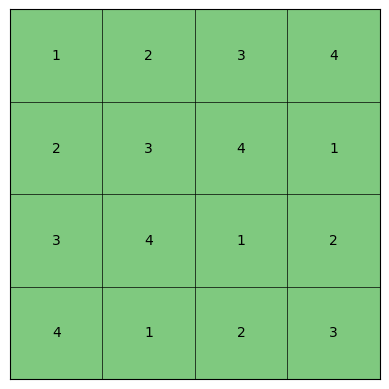

[[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]


In [1]:
import matplotlib.pyplot as plt

#une solution naïve est proposé ici
def latin_square(N, K):
    if K < N or K > N*N:
        return "Impossible"

    square_latin = [[0] * N for _ in range(N)]

    # Remplissage de la première ligne
    liste = [i for i in range(1,N+1)]
    for i in range(N) :
      for j in range(N) :
        square_latin[i][j] = liste[j]

      liste.append(i+1)
      liste.pop(0)
    print()
    indicium = sum(square_latin[i][i] for i in range(N))
    if indicium == K:
        show_square(square_latin,N)
    else:
        return "Impossible"
    print(square_latin)
def show_square(puzzle,N) :

    cmap = plt.get_cmap('Accent_r')
    fig, ax = plt.subplots()
    ax.matshow(puzzle, cmap=cmap, vmin=0, vmax=1)
    for i in range(1, N):
      ax.axhline(i-0.5, color='black', lw=0.5)
      ax.axvline(i-0.5, color='black', lw=0.5)
    for i in range(N):
        for j in range(N):
            ax.text(j, i, str(puzzle[i][j]), ha='center', va='center')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


N = 4
K = 8
result = latin_square(N, K)
result

# 2. NumPy: Régression Logistique



<ipython-input-13-a3d28b5bd537>:62: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(self.sigmoid(z)) + (1 - y) * np.log(1 - self.sigmoid(z)))
<ipython-input-13-a3d28b5bd537>:62: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y * np.log(self.sigmoid(z)) + (1 - y) * np.log(1 - self.sigmoid(z)))
<ipython-input-13-a3d28b5bd537>:111: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == j, 0], X[y == j, 1], c=color, label=j, cmap=plt.cm.RdYlBu, edgecolor='black')


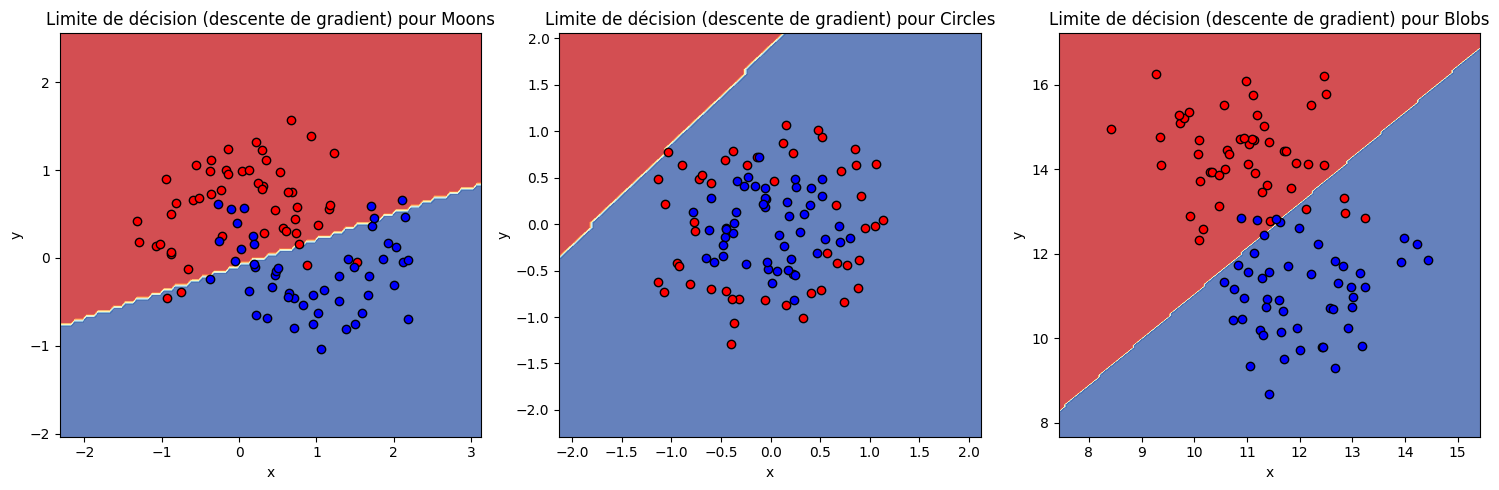

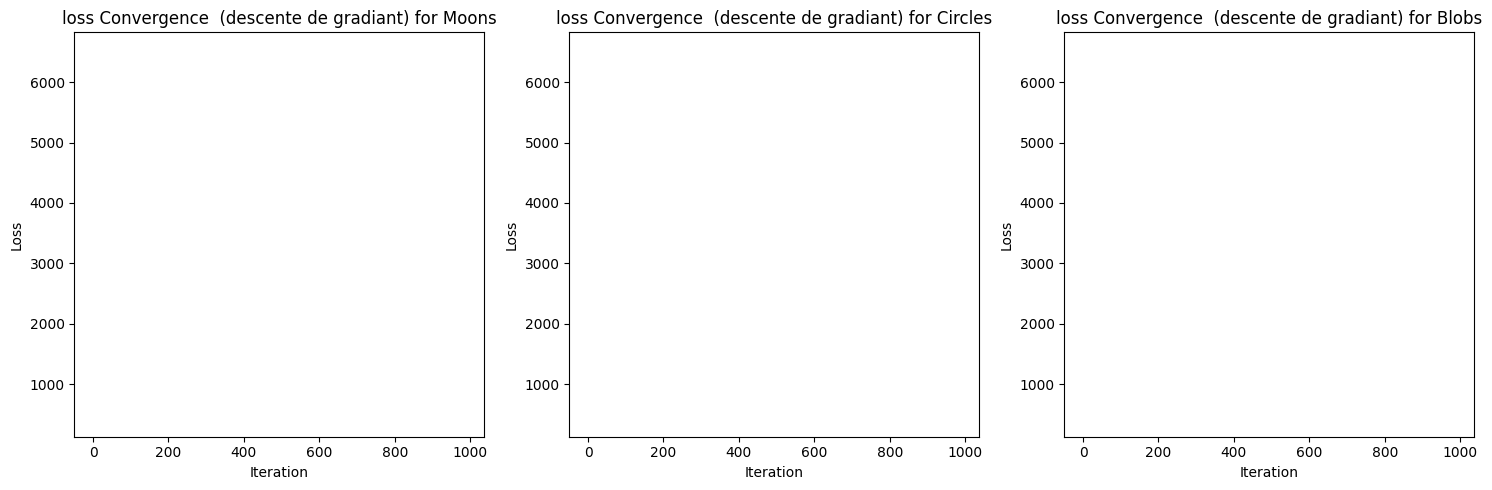

<ipython-input-13-a3d28b5bd537>:156: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == j, 0], X[y == j, 1], c=color, label=j, cmap=plt.cm.RdYlBu, edgecolor='black')


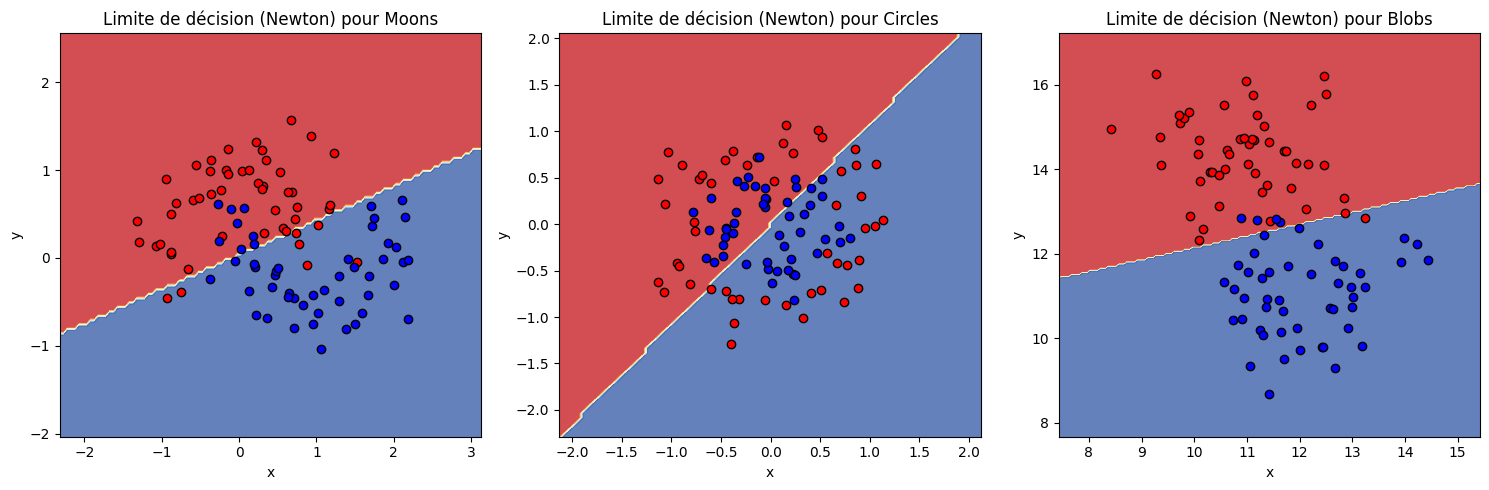

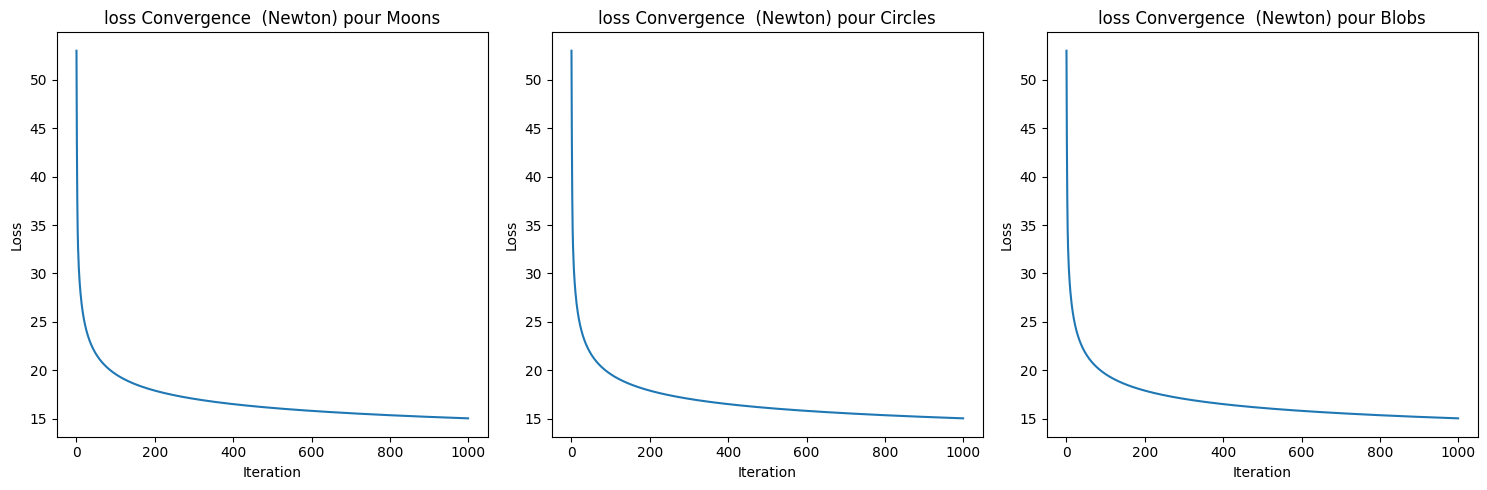

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs

class LogisticRegression:
    """
    Implemente un classificateur de régression logistique avec fonction de transformation sigmoïde.

    Arguments:
        nb_iter (int, optional): Nombre d'itérations de l'algorithme d'optimisation. Par défaut, 1000.
        optimizer (str, optional): Algorithme d'optimisation à utiliser. Les valeurs possibles sont "gradient_descent" et "newton". Par défaut, "gradient_descent".

    Attributs:
        beta (np.ndarray): Paramètres du modèle.
        loss_values (list): Valeurs de la fonction de perte à chaque itération de l'algorithme d'optimisation.

    Méthodes:
        sigmoid(X): Calcule la fonction sigmoïde sur les données X.
        gradient(X, y): Calcule le gradient de la fonction de perte par rapport aux paramètres du modèle.
        hessienne(X): Calcule la hessienne de la fonction de perte par rapport aux paramètres du modèle.
        fit(X, y): Entraîne le modèle sur les données X et les étiquettes y.
        predict(X): Prédicte les étiquettes des données X.
    """

    def __init__(self, nb_iter=1000, optimizer="gradient_descent"):
        self.nb_iter = nb_iter
        self.optimizer = optimizer

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def gradient(self, X, y):
        z = np.dot(X, self.beta)
        gradient = X.T @ (self.sigmoid(z) - y)
        return gradient

    def hessienne(self, X):
        z = np.dot(X, self.beta)
        diag_values = self.sigmoid(z)/(1 - self.sigmoid(z))
        diag_matrix = np.diag(diag_values)
        H = X.T @ diag_matrix @ X
        return H

    def fit(self, X, y):
        X = np.column_stack((np.ones(X.shape[0]), X))
        lambd = np.max(X)
        alpha = 4 / (lambd ** 2)
        self.beta = np.zeros(X.shape[1])
        self.loss_values = []  # j'essaye de récuperer les valeurs perdues

        for t in range(self.nb_iter):
            if self.optimizer == 'gradient_descent':
                gradient = self.gradient(X, y)
                self.beta -= alpha * gradient
            elif self.optimizer == 'newton':
                H = self.hessienne(X)
                gradient = self.gradient(X, y)
                self.beta -= np.linalg.inv(H) @ gradient

            # Calculez la perte et ajouter à la liste
            z = np.dot(X, self.beta)
            loss = -np.sum(y * np.log(self.sigmoid(z)) + (1 - y) * np.log(1 - self.sigmoid(z)))
            self.loss_values.append(loss)

    def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X))
        z = np.dot(X, self.beta)
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Créer une instance de la classe LogisticRegression pour la descente de gradient
model_gradient_descent = LogisticRegression(nb_iter=1000, optimizer='gradient_descent')

# Créer une instance de la classe LogisticRegression pour la méthode de Newton
model_newton = LogisticRegression(nb_iter=1000, optimizer='newton')

# Charger les datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Noms des jeux de données
dataset_names = ['Moons', 'Circles', 'Blobs']

# Couleurs pour les graphiques
colors = ['red', 'blue']

plt.figure(figsize=(15, 5))

for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)

    # Entraîner le modèle sur les données avec la descente de gradient
    model_gradient_descent.fit(X, y)

    # Créer une grille pour afficher la frontière de décision
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model_gradient_descent.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Afficher la frontière de décision
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Afficher les points de données
    for j, color in zip(np.unique(y), colors):
        plt.scatter(X[y == j, 0], X[y == j, 1], c=color, label=j, cmap=plt.cm.RdYlBu, edgecolor='black')

    plt.title(f'Limite de décision (descente de gradient) pour {dataset_names[i]}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

# Tracez la convergence de la fonction de perte pour la méthode de la descente de gradient
plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.plot(range(len(model_gradient_descent.loss_values)), model_gradient_descent.loss_values)
    plt.title(f'loss Convergence  (descente de gradiant) for {dataset_names[i]}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Créer un nouvel modèle pour la méthode de Newton
model_newton = LogisticRegression(nb_iter=1000, optimizer='newton')

plt.figure(figsize=(15, 5))

for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)

    # Entraîner le modèle sur les données avec la méthode de Newton
    model_newton.fit(X, y)

    # Créer une grille pour afficher la frontière de décision
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = model_newton.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Afficher la frontière de décision
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Afficher les points de données
    for j, color in zip(np.unique(y), colors):
        plt.scatter(X[y == j, 0], X[y == j, 1], c=color, label=j, cmap=plt.cm.RdYlBu, edgecolor='black')

    plt.title(f'Limite de décision (Newton) pour {dataset_names[i]}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

# Tracez la convergence de la fonction de perte pour la méthode de Newton
plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.plot(range(len(model_newton.loss_values)), model_newton.loss_values)
    plt.title(f'loss Convergence  (Newton) pour {dataset_names[i]}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

plt.tight_layout()
plt.show()


# 3. Arbres de Décision

## DecisionTree

In [ ]:
datasets=[make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

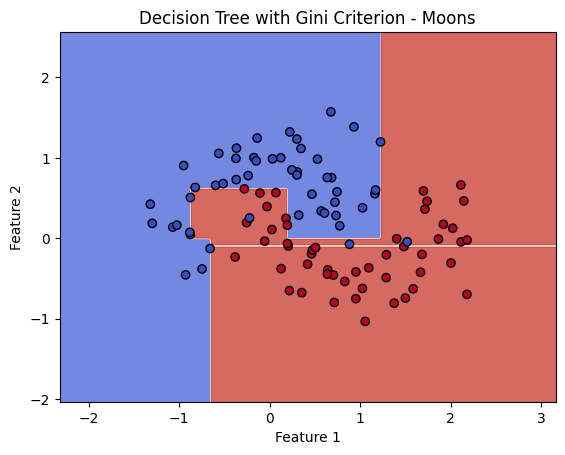

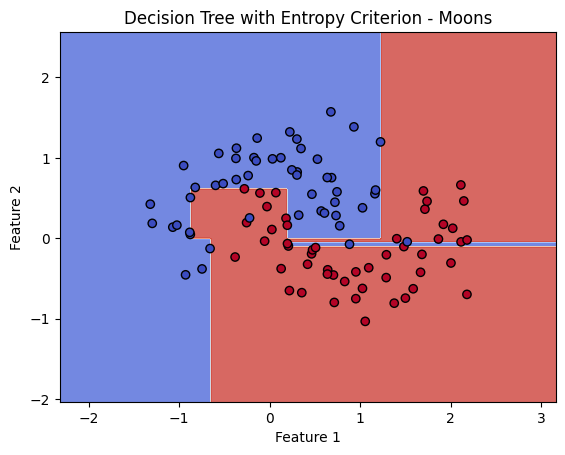

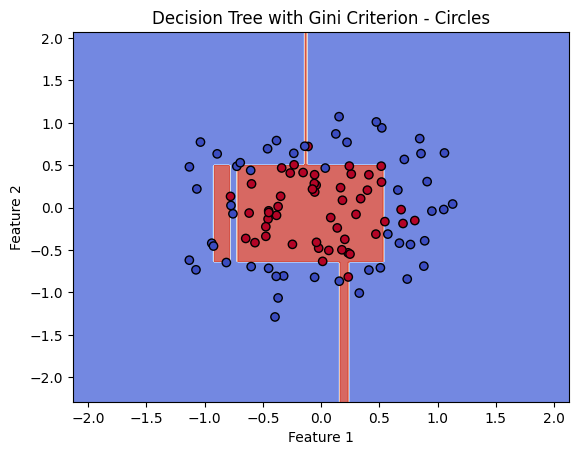

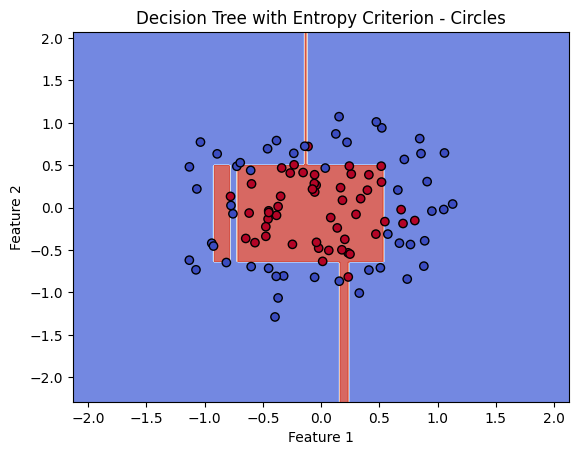

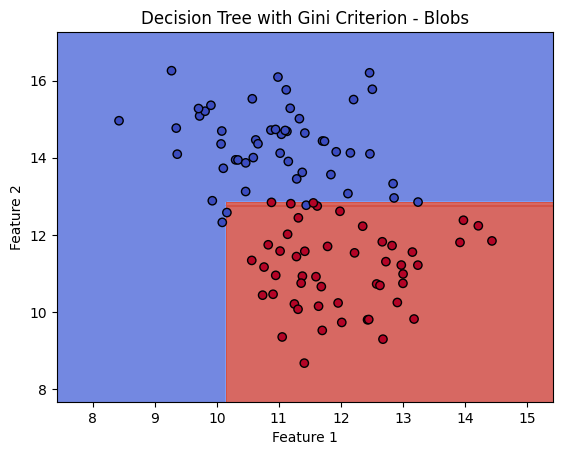

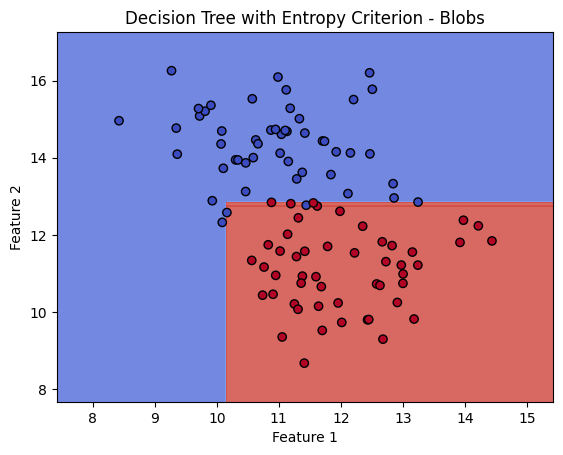

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
datasets=[make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]
class DecisionTree:
    """
      Implemente un classificateur d'arbre de décision utilisant le critère d'impureté de Gini ou d'entropie.

      Parameters:
          criterion (str): Critère d'impureté à utiliser pour la division. La valeur par défaut est "gini".
              Les critères supportés sont 'gini' et 'entropy'.

      Attributes:
          tree (dict): Le noeud racine de l'arbre de décision.
          criterion (str): Critère d'impureté utilisé pour la division.

      Methods:
          _calculate_impurity(self, counts): Calcule l'impureté d'un ensemble donné de nombres de classes.
          _split_dataset(self, X, y, feature_index, threshold): Divise l'ensemble de données en fonction d'une caractéristique et d'un seuil.
          _find_best_split(self, X, y): Détermine la meilleure caractéristique et le meilleur seuil pour diviser l'ensemble de données.
          _build_tree(self, X, y, depth=0, max_depth=5): Construit de manière récursive l'arbre de décision.
          fit(self, X, y): Ajuste l'arbre de décision aux données et aux étiquettes données.
          _predict_single(self, tree, sample): Predit l'étiquette de la classe pour un seul échantillon.
          predict(self, X): Prédit les étiquettes de classe pour un ensemble donné d'échantillons.
          plot_decision_boundary(model, X, y, title): Trace la frontière de décision pour un modèle donné.
      """
    def __init__(self, criterion='gini'):
        self.criterion = criterion
        self.tree = None

    def _calculate_impurity(self, counts):
        total_samples = sum(counts)
        if self.criterion == 'gini':
            impurity = 1 - sum((count / total_samples) ** 2 for count in counts)
        elif self.criterion == 'entropy':
            impurity = -sum((count / total_samples) * np.log2(count / total_samples) if count != 0 else 0 for count in counts)
        else:
            raise ValueError("Invalid criterion. Choose 'gini' or 'entropy'.")
        return impurity

    # on utilise exceptionnellement numpy pour effectuer cette partie du code
    def _split_dataset(self, X, y, feature_index, threshold):
        left_indices = np.where(X[:, feature_index] <= threshold)[0]
        right_indices = np.where(X[:, feature_index] > threshold)[0]
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[right_indices], y[right_indices]
        return X_left, y_left, X_right, y_right

    def _find_best_split(self, X, y):
        best_feature_index = None
        best_threshold = None
        best_impurity = float('inf')

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, y_left, X_right, y_right = self._split_dataset(X, y, feature_index, threshold)

                left_counts = np.bincount(y_left)
                right_counts = np.bincount(y_right)

                left_impurity = self._calculate_impurity(left_counts)
                right_impurity = self._calculate_impurity(right_counts)

                total_impurity = (len(y_left) * left_impurity + len(y_right) * right_impurity) / len(y)

                if total_impurity < best_impurity:
                    best_impurity = total_impurity
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def _build_tree(self, X, y, depth=0, max_depth=5):
        unique_classes = np.unique(y)

        if len(unique_classes) == 1:
            return {'class': unique_classes[0]}

        if depth >= max_depth:
            return {'class': np.argmax(np.bincount(y))}

        best_feature_index, best_threshold = self._find_best_split(X, y)
        if best_feature_index is None or best_threshold is None:
            return {'class': np.argmax(np.bincount(y))}

        X_left, y_left, X_right, y_right = self._split_dataset(X, y, best_feature_index, best_threshold)

        left_subtree = self._build_tree(X_left, y_left, depth + 1, max_depth)
        right_subtree = self._build_tree(X_right, y_right, depth + 1, max_depth)

        return {'feature_index': best_feature_index,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree}

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']
        else:
            if sample[tree['feature_index']] <= tree['threshold']:
                return self._predict_single(tree['left'], sample)
            else:
                return self._predict_single(tree['right'], sample)

    def predict(self, X):
        predictions = []
        for sample in X:
            prediction = self._predict_single(self.tree, sample)
            predictions.append(prediction)
        return np.array(predictions)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
for i, (X, y) in enumerate(datasets):
  names=['Moons', 'Circles', 'Blobs']
    # Création de l'instance de l'arbre avec critère "gini" et entraînement
  tree_gini = DecisionTree(criterion='gini')
  tree_gini.fit(X, y)
  plot_decision_boundary(tree_gini, X, y, f"Decision Tree with Gini Criterion - {names[i]}")

    # Création de l'instance de l'arbre avec critère "entropy" et entraînement
  tree_entropy = DecisionTree(criterion='entropy')
  tree_entropy.fit(X, y)
  plot_decision_boundary(tree_entropy, X, y, f"Decision Tree with Entropy Criterion - {names[i]}")

# Exemple d'utilisation avec des données générées aléatoirement



## Forêt Aléatoire

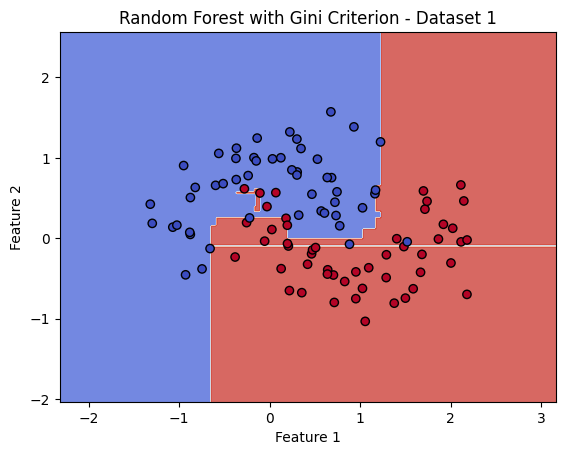

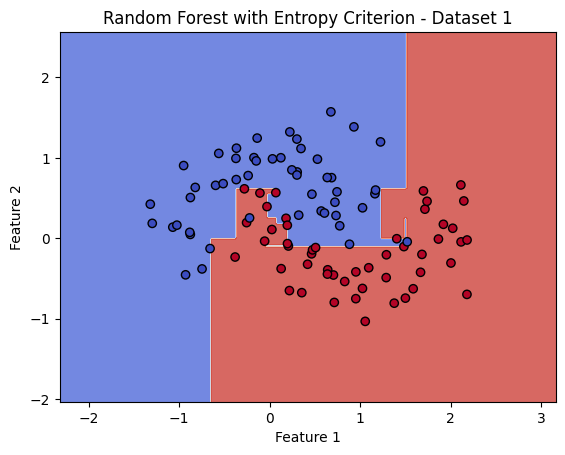

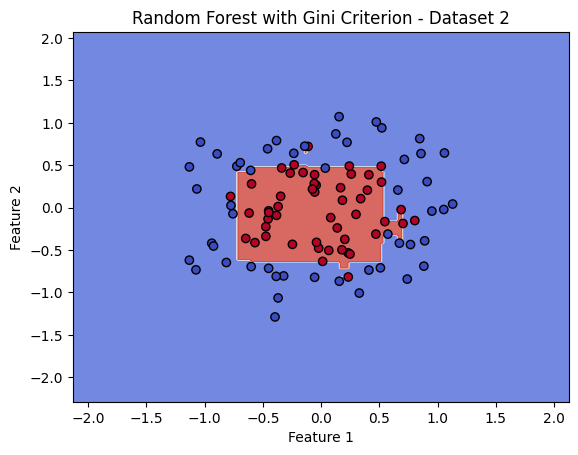

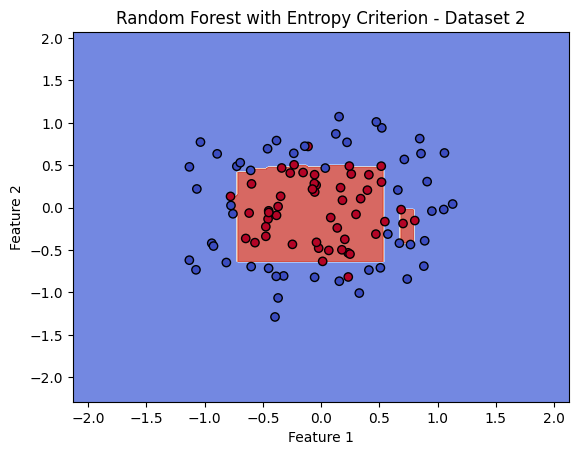

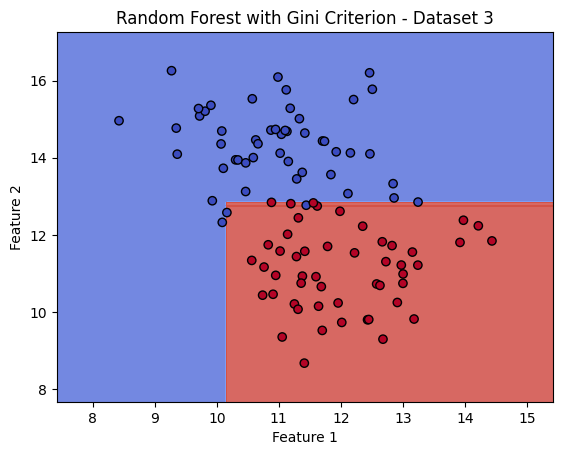

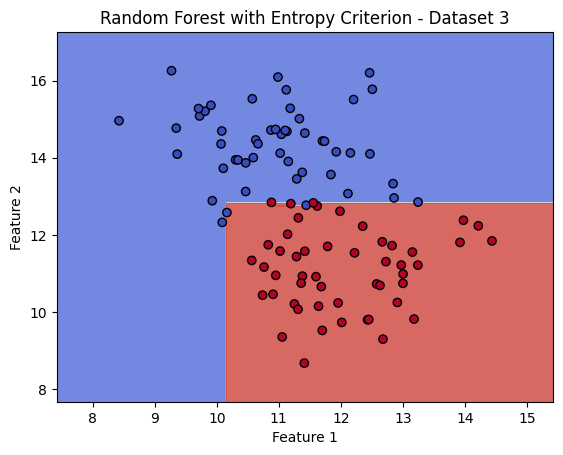

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs
class RandomForest:
    """
    Implemente un classificateur de forêt aléatoire utilisant le critère d'impureté de Gini ou d'entropie.

    Parameters:
		criterion (str): Critère d'impureté à utiliser pour la division. La valeur par défaut est "gini".
            Les critères supportés sont 'gini' et 'entropy'.

    Attributes:
		forest (list): La liste des arbres de la forêt.

    Methods:
		fit(self, X, y): Prédire les étiquettes de classe pour un ensemble donné d'échantillons.Cette méthode s'entraîne sur les données d'entraînement données
			et construit une forêt aléatoire de `n_estimators` arbres. Chaque arbre est construit en utilisant un sous-échantillon aléatoire des données d'entraînement.
			Le critère d'impureté spécifié est utilisé pour choisir la meilleure caractéristique et le meilleur seuil pour fractionner chaque nœud de l'arbre.
		predict(self, X):Prédire les étiquettes de classe pour un ensemble donné d'échantillons.Cette méthode prédit les étiquettes de classe pour les échantillons donnés
			en votant pour les étiquettes de classe prédites par chaque arbre de la forêt.
			L'étiquette de classe prédite pour un échantillon est l'étiquette la plus courante parmi les étiquettes prédites par les arbres.
		_calculate_impurity(self, counts): Calcule l'impureté d'un ensemble donné de nombres de classes.
		_split_dataset(self, X, y, feature_index, threshold): Divise l'ensemble de données en fonction d'une caractéristique et d'un seuil.
		_find_best_split(self, X, y): Détermine la meilleure caractéristique et le meilleur seuil pour diviser l'ensemble de données.
		_build_tree(self, X, y, depth=0, max_depth=5): Construit de manière récursive l'arbre de décision.
		_predict_single(self, tree, sample): Predit l'étiquette de la classe pour un seul échantillon.
		plot_decision_boundary(model, X, y, title): Trace la frontière de décision pour un modèle donné.
    """
    def __init__(self, n_estimators=10, criterion='gini'):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.forest = []

    def fit(self, X, y):
        self.forest = []
        for _ in range(self.n_estimators):
            tree = DecisionTree(criterion=self.criterion)
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
            tree.fit(X_bootstrap, y_bootstrap)
            self.forest.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_estimators))
        for i, tree in enumerate(self.forest):
            predictions[:, i] = tree.predict(X)
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=predictions.astype(int))
#test
datasets=[make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]
dataset_names = ['Moons', 'Circles', 'Blobs']
def plot_decision_boundary(model, X, y, title):

  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

  # Votre implémentation de la fonction plot_decision_boundary précédente
  # Exemple d'utilisation avec les mêmes jeux de données précédentes
for i, (X,y) in enumerate(datasets):
  title = f"Dataset {i+1}"
  # Création de l'instance de RandomForest avec 10 arbres et critère "gini"
  forest_gini = RandomForest(n_estimators=10, criterion='gini')
  forest_gini.fit(X, y)
  plot_decision_boundary(forest_gini, X, y, f"Random Forest with Gini Criterion - {title}")
  # Création de l'instance de RandomForest avec 10 arbres et critère "entropy"
  forest_entropy = RandomForest(n_estimators=10, criterion='entropy')
  forest_entropy.fit(X, y)
  plot_decision_boundary(forest_entropy, X, y, f"Random Forest with Entropy Criterion - {title}")



## 4. CVXPY: Machine à Vecteurs de Support

Pour l'implémentation de la classe SVM, Nous avons deux solutions. La première utilise la bibliothèque cvxpy, qui permet de résoudre des problèmes d'optimisation convexe de manière efficace. Cependant, Nous avons rencontré des problèmes avec cette solution Nous avons une erreur qui indique que les dimensions ne sont pas compatibles lors de l'utilisation de l'opération de multiplication avec cp.multiply(y, X @ alpha + b). La dimension de y est (4,) et celle de X @ alpha + b est (4,). L'opération cp.multiply tente de multiplier ces deux matrices, mais elles ne peuvent pas être diffusées (broadcasted) ensemble car elles n'ont pas les mêmes dimensions. Nous avons essayer de corriger les problemes de dimension mais sans resultat.La deuxième solution utilise une approche plus simple, sans cvxpy. Cette solution consiste à résoudre le problème d'optimisation SVM par une méthode de gradient descendant. Cette approche est plus simple à implémenter mais ne fonctionne que avec un kernel linear.


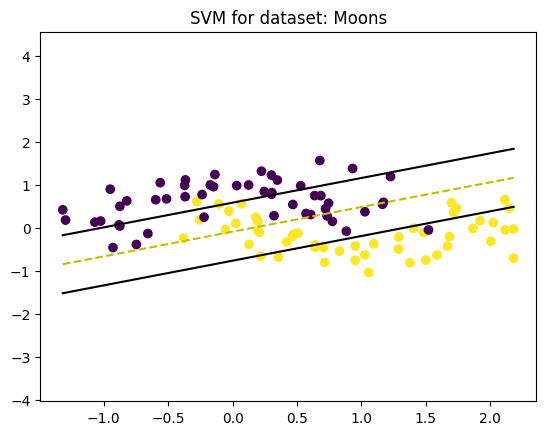

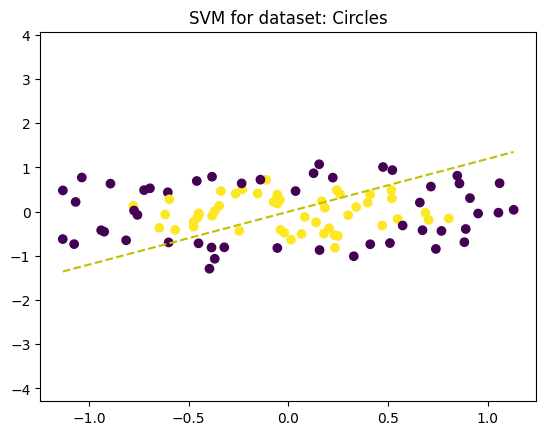

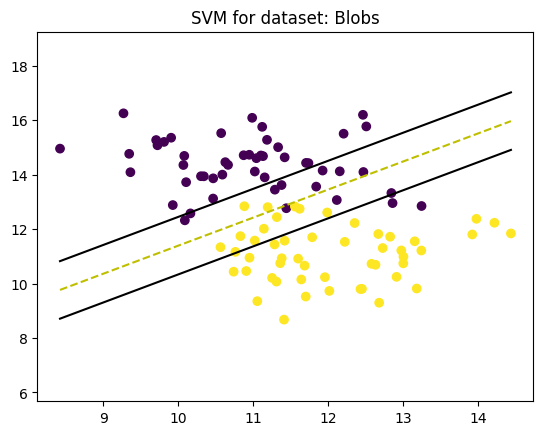

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

def plot_svm(clf, X, y, dataset_name):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.title(f'SVM for dataset: {dataset_name}')
    plt.show()

# Testing
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]
dataset_names = ['Moons', 'Circles', 'Blobs']

for i, (X, y) in enumerate(datasets):
    y = np.where(y == 0, -1, 1)
    clf = SVM()
    clf.fit(X, y)
    plot_svm(clf, X, y, dataset_names[i])


In [ ]:
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, kernel='linear', C=None):
        self.kernel = kernel
        self.C = C
        self.alpha = None
        self.b = None
        self.X_train = None
        self.y_train = None

    def _linear_kernel(self, x1, x2):
        return np.dot(x1, x2)

    def _rbf_kernel(self, x1, x2, gamma=0.1):
        return np.exp(-gamma * np.sum((x1 - x2)**2))

    def fit(self, X, y):

		# Avant la définition des variables et des contraintes
        print("Dimensions de X avant optimisation :", X.shape)
        print("Dimensions de y avant optimisation :", y.shape)



        self.X_train = X
        self.y_train = y
        m,n  = X.shape

        # Variables
        alpha = cp.Variable(n)
        xi = cp.Variable(m)
        b = cp.Variable()
        # Après la définition des variables
        print("Dimensions de alpha après définition :", alpha.shape)

        # Constraints
        constraints = [0 <= alpha, alpha <= self.C, xi >= 0, cp.sum(cp.multiply(y, X @ alpha + b)) >= 1 - xi, cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(alpha, y), X, assume_PSD=True) >= 0]



        # Après la définition des contraintes
        print("Dimensions de X @ alpha après contraintes :", (X @ alpha).shape)

        # Objective function
        obj = cp.Minimize(0.5 * cp.norm(alpha)**2 + self.C * cp.sum(xi))

        # Problem definition
        prob = cp.Problem(obj, constraints)

        # Solve the problem
        prob.solve()

        # Store the results
        self.alpha = alpha.value
        self.b = b.value

    def predict(self, X):
        decision_function = X @ self.X_train.T @ self.alpha + self.b
        return np.sign(decision_function.flatten())

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'Decision Boundary for {self.kernel.capitalize()} SVM')
        plt.show()

# Vos données d'entraînement
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([-1, -1, 1, 1])


# Exemple d'utilisation :
# Création d'une instance de la classe SVM avec un kernel RBF et C=1
svm_rbf = SVM(kernel='linear', C=0.025)
# Entraînement sur un jeu de données X_train, y_train
svm_rbf.fit(X_train, y_train)
# Affichage de la frontière de décision
svm_rbf.plot_decision_boundary(X_train, y_train)


Dimensions de X avant optimisation : (4, 2)
Dimensions de y avant optimisation : (4,)
Dimensions de alpha après définition : (2,)


ValueError: ignored